<a href="https://colab.research.google.com/github/NikitaLokhande25/AI-based-Innovation-and-Product-Development/blob/main/AIPD_comparison_by_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment : Sentiment Analysis**

**Name:** Nikita Pravin Lokhande.

**Roll No:** 23107070

**Batch:** A.

**Title:** Comparison of OLA and Uber from 2023 year sentiment analysis dataset

In [1]:
# OLA

In [4]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
ola = pd.read_csv(
    "Ola Customer Reviews.csv",
    engine="python",
    on_bad_lines="skip")

print(ola.shape)

(357698, 13)


In [6]:
ola.columns

Index(['source', 'review_id', 'user_name', 'review_title',
       'review_description', 'rating', 'thumbs_up', 'review_date',
       'developer_response', 'developer_response_date', 'appVersion',
       'laguage_code', 'country_code'],
      dtype='object')

In [7]:
ola_text_col = 'content'
ola_date_col = 'at'

In [9]:
ola['year'] = pd.to_datetime(ola['review_date'], errors='coerce').dt.year
ola_2023 = ola[ola['year'] == 2023]

print("Ola reviews in 2023:", len(ola_2023))

Ola reviews in 2023: 20148


In [10]:
sia = SentimentIntensityAnalyzer()

def sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

In [12]:
ola_2023['sentiment'] = ola_2023['review_description'].apply(sentiment)

ola_2023['sentiment'].value_counts()

/tmp/ipython-input-4124326418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ola_2023['sentiment'] = ola_2023['review_description'].apply(sentiment)


,count
sentiment,
Negative,11927
Positive,5412
Neutral,2809


In [ ]:
#Uber

In [13]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
uber = pd.read_csv(
    "Uber Customer Reviews.csv",
    engine="python",
    on_bad_lines="skip"
)

print(uber.shape)

(1069616, 13)


In [19]:
uber.columns

Index(['source', 'review_id', 'user_name', 'review_title',
       'review_description', 'rating', 'thumbs_up', 'review_date',
       'developer_response', 'developer_response_date', 'appVersion',
       'laguage_code', 'country_code'],
      dtype='object')

In [24]:
uber_text_col = 'review_description'
uber_date_col = 'review_date'

In [21]:
uber['year'] = pd.to_datetime(uber[uber_date_col], errors='coerce').dt.year
uber_2023 = uber[uber['year'] == 2023]

print("Uber reviews in 2023:", len(uber_2023))

Uber reviews in 2023: 126781


In [22]:
sia = SentimentIntensityAnalyzer()

def sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

In [25]:
uber_2023['sentiment'] = uber_2023[uber_text_col].apply(sentiment)

uber_2023['sentiment'].value_counts()

/tmp/ipython-input-2493573022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_2023['sentiment'] = uber_2023[uber_text_col].apply(sentiment)


,count
sentiment,
Positive,86531
Negative,21761
Neutral,18489


In [26]:
# comparison :

ola_pos = ola_2023['sentiment'].value_counts().get('Positive', 0)
uber_pos = uber_2023['sentiment'].value_counts().get('Positive', 0)

print("OLA Positive:", ola_pos)
print("UBER Positive:", uber_pos)

if uber_pos > ola_pos:
    print("Conclusion: UBER performed better in 2023 based on sentiment analysis")
else:
    print("Conclusion: OLA performed better in 2023 based on sentiment analysis")

OLA Positive: 5412
UBER Positive: 86531
Conclusion: UBER performed better in 2023 based on sentiment analysis


In [27]:
import matplotlib.pyplot as plt

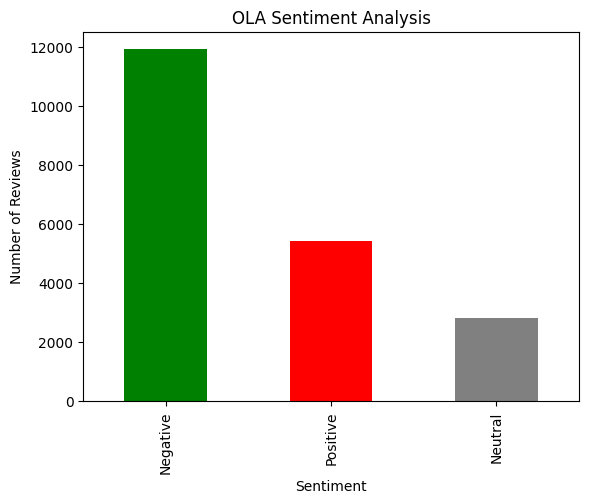

In [28]:
ola_counts = ola_2023['sentiment'].value_counts()

# Plot
ola_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("OLA Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

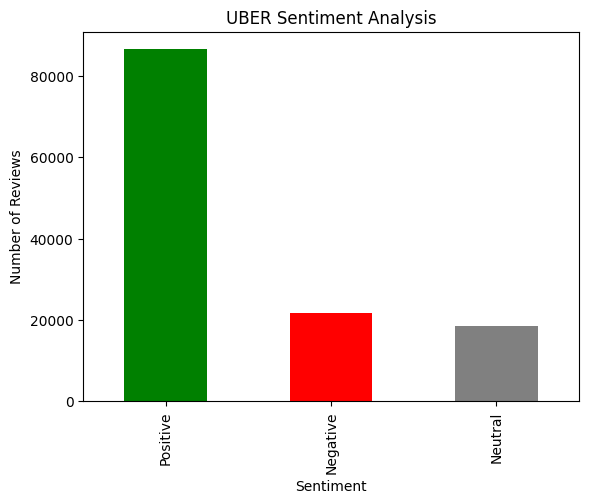

In [29]:
uber_counts = uber_2023['sentiment'].value_counts()

# Plot
uber_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("UBER Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

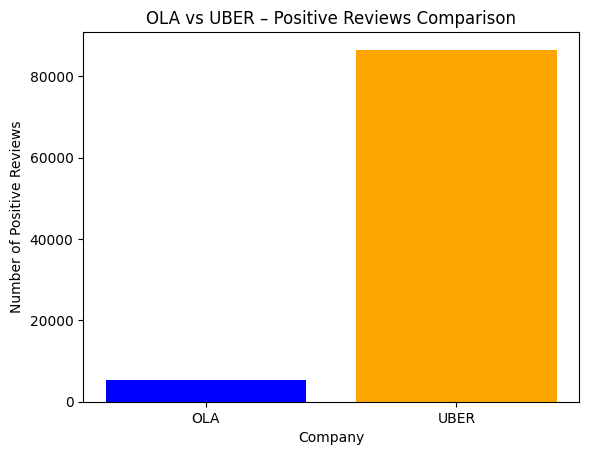

In [30]:
companies = ['OLA', 'UBER']
positive_counts = [
    ola_counts.get('Positive', 0),
    uber_counts.get('Positive', 0)
]

plt.bar(companies, positive_counts, color=['blue', 'orange'])
plt.title("OLA vs UBER – Positive Reviews Comparison")
plt.xlabel("Company")
plt.ylabel("Number of Positive Reviews")
plt.show()